In [329]:
# Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.graph_objs as go
from collections import Counter
from tqdm import tqdm

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector

###  Просмотр данных

In [330]:
df = pd.read_csv('train-2.csv') # считываем данные

In [331]:
df.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low


In [332]:
n = len(df)
useless_cols = ['Id', 'listing_id', 'building_id', 'manager_id'] # удалим ненужные колонки
df.drop(columns=useless_cols, inplace=True)

In [333]:
df.info(); # информация по типам и пропускам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        34546 non-null  float64
 1   bedrooms         34546 non-null  int64  
 2   created          34546 non-null  object 
 3   description      33509 non-null  object 
 4   display_address  34458 non-null  object 
 5   features         34546 non-null  object 
 6   latitude         34546 non-null  float64
 7   longitude        34546 non-null  float64
 8   photos           34546 non-null  object 
 9   price            34546 non-null  int64  
 10  street_address   34542 non-null  object 
 11  TARGET           34546 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 3.2+ MB


In [334]:
df.describe() # статистики по колонкам

,bathrooms,bedrooms,latitude,longitude,price
count,34546.000000,34546.000000,34546.000000,34546.000000,3.454600e+04
mean,1.211182,1.540815,40.741878,-73.954803,3.888823e+03
std,0.496217,1.116735,0.622257,1.126953,2.630662e+04
min,0.000000,0.000000,0.000000,-75.521400,4.500000e+01
25%,1.000000,1.000000,40.728000,-73.991700,2.500000e+03
50%,1.000000,1.000000,40.751600,-73.977900,3.150000e+03
75%,1.000000,2.000000,40.774000,-73.954900,4.100000e+03
max,6.000000,8.000000,44.603800,0.000000,4.490000e+06


In [335]:
df.dtypes.value_counts() # типы колонок

object     7
float64    3
int64      2
dtype: int64

In [336]:
df.select_dtypes(include=['float64', 'int64']).head() # числовые данные

,bathrooms,bedrooms,latitude,longitude,price
0,1.0,3,40.7647,-73.9918,4495
1,1.0,1,40.7275,-74.0322,2570
2,1.0,0,40.7798,-73.9751,1795
3,1.0,2,40.7081,-74.0065,3400
4,1.0,3,40.7416,-74.0025,5695


In [337]:
df.select_dtypes(include=['object']).head()

,created,description,display_address,features,photos,street_address,TARGET
0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",['https://photos.renthop.com/2/7039994_07be01b...,W 50 & AVE 10,medium
1,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",['https://photos.renthop.com/2/7166774_03cf63a...,55 River Drive South,medium
2,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",['https://photos.renthop.com/2/6962716_ec7f56f...,22 W 77 Street,low
3,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",['https://photos.renthop.com/2/7002458_93f4010...,100 John Street,low
4,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",['https://photos.renthop.com/2/7170465_9c3f173...,321 West 16th Street,low


### Обработка пропусков

In [338]:
df.isna().any()

bathrooms          False
bedrooms           False
created            False
description         True
display_address     True
features           False
latitude           False
longitude          False
photos             False
price              False
street_address      True
TARGET             False
dtype: bool

In [339]:
df.isna().sum()

bathrooms             0
bedrooms              0
created               0
description        1037
display_address      88
features              0
latitude              0
longitude             0
photos                0
price                 0
street_address        4
TARGET                0
dtype: int64

In [340]:
df.drop(columns=np.array(['display_address', 'street_address']), inplace=True) # удалим строковые адреса

<AxesSubplot:xlabel='TARGET', ylabel='count'>

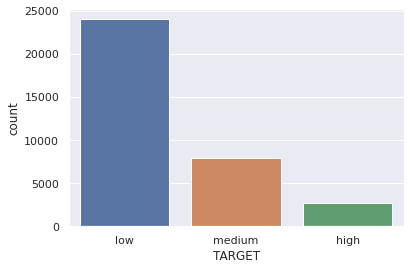

In [341]:
sns.countplot(x="TARGET", data=df, order = ['low', 'medium', 'high'])

In [342]:
df['TARGET'] = df['TARGET'].map({'low' : 0, 'medium' : 1, 'high' : 2}) # преобразование целевого признака

In [343]:
df.head()

,bathrooms,bedrooms,created,description,features,latitude,longitude,photos,price,TARGET
0,1.0,3,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,-73.9918,['https://photos.renthop.com/2/7039994_07be01b...,4495,1
1,1.0,1,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,-74.0322,['https://photos.renthop.com/2/7166774_03cf63a...,2570,1
2,1.0,0,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,"['Elevator', 'Hardwood Floors']",40.7798,-73.9751,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,0
3,1.0,2,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,-74.0065,['https://photos.renthop.com/2/7002458_93f4010...,3400,0
4,1.0,3,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,-74.0025,['https://photos.renthop.com/2/7170465_9c3f173...,5695,0


### Дата и время

In [344]:
X_train = df.drop(columns=['TARGET'])
y_train = df['TARGET']

In [345]:
def date_parser(datestr):
    return pd.datetime.strptime(datestr, '%Y-%m-%d %H:%M:%S')

In [346]:
X_train['created'].apply(date_parser)

0       2016-05-19 18:06:27
1       2016-06-16 02:01:49
2       2016-05-04 02:42:50
3       2016-05-12 05:57:56
4       2016-06-16 06:06:15
                ...        
34541   2016-06-16 02:12:57
34542   2016-05-10 03:17:32
34543   2016-04-21 03:29:35
34544   2016-05-14 02:27:47
34545   2016-04-05 03:35:52
Name: created, Length: 34546, dtype: datetime64[ns]

In [347]:
X_train['created'] = pd.to_datetime(X_train['created'], infer_datetime_format=True)

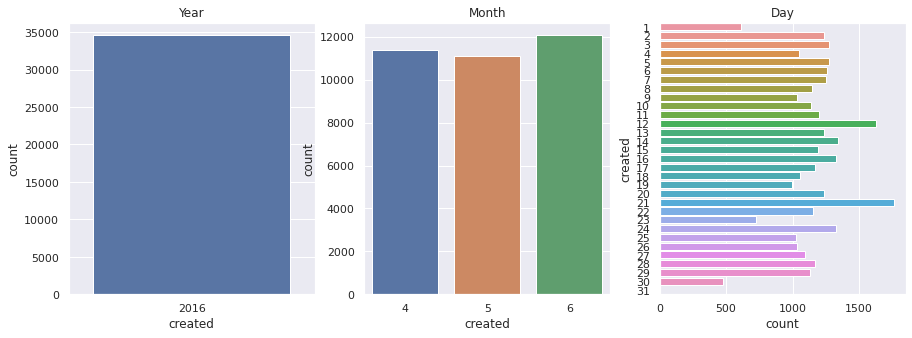

In [348]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Year')
sns.countplot(x=X_train['created'].dt.year)
plt.subplot(1, 3, 2)
plt.title('Month')
sns.countplot(x=X_train['created'].dt.month)
plt.subplot(1, 3, 3)
plt.title('Day')
sns.countplot(y=X_train['created'].dt.day);

In [349]:
min_day = X_train['created'].min()
print(min_day)
day1 = X_train['created'][0]
day2 = X_train['created'][1]
dif = day2 - day1
print(dif.days)

2016-04-01 22:56:00
27


In [350]:
min_day = X_train['created'].min() # саммый ранний день в нашем датасете
X_train.insert(0, 'month', X_train['created'].dt.month) # создания колонок месяца
X_train.insert(1, 'day', (X_train['created'] - min_day).dt.days) # создания колонок дня дней
# Является ли этот день выходным
X_train['is_weekend'] = X_train['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)
X_train.drop(columns=['created'], inplace=True) # удаление полной даты

In [351]:
X_train.fillna(value='', inplace=True) # заполнение пропусков в description

In [352]:
X_train['num_features'] = X_train['features'].apply(lambda x : x.count('\'') / 2) # количество "свойств"
X_train['num_photos'] = X_train['photos'].apply(lambda x : x.count('\'') / 2) # количество фотографий
X_train['len_description'] = X_train['description'].apply(lambda x : len(x)) # длина описания
X_train['description_NA'] = (X_train['description'] == '')

In [353]:
X_train.drop(columns=['features', 'photos', 'description'], inplace=True)

In [354]:
X_train['price_per_room'] = X_train['price'] / (X_train['bedrooms'] + X_train['bathrooms'])
X_train['price_per_room'][X_train['price_per_room'] == np.inf] = -1
X_train['price_per_room'][X_train['price_per_room'] == -1] = X_train['price_per_room'].max() * 2

In [355]:
X_train.head()

,month,day,bathrooms,bedrooms,latitude,longitude,price,is_weekend,num_features,num_photos,len_description,description_NA,price_per_room
0,5,47,1.0,3,40.7647,-73.9918,4495,0,3.0,3.0,476,False,1123.750000
1,6,75,1.0,1,40.7275,-74.0322,2570,0,3.0,13.0,31,False,1285.000000
2,5,32,1.0,0,40.7798,-73.9751,1795,0,2.0,6.0,280,False,1795.000000
3,5,40,1.0,2,40.7081,-74.0065,3400,0,8.0,4.0,1158,False,1133.333333
4,6,75,1.0,3,40.7416,-74.0025,5695,0,4.0,3.0,785,False,1423.750000


### Визуализация

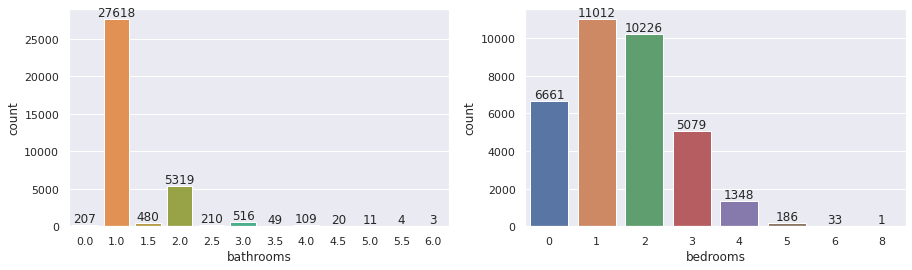

In [356]:
# категориальные данные
#took from https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
ax = sns.countplot(x=X_train['bathrooms'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.subplot(1, 2, 2)
ax = sns.countplot(x=X_train['bedrooms'])
ax.bar_label(ax.containers[0], label_type='edge');

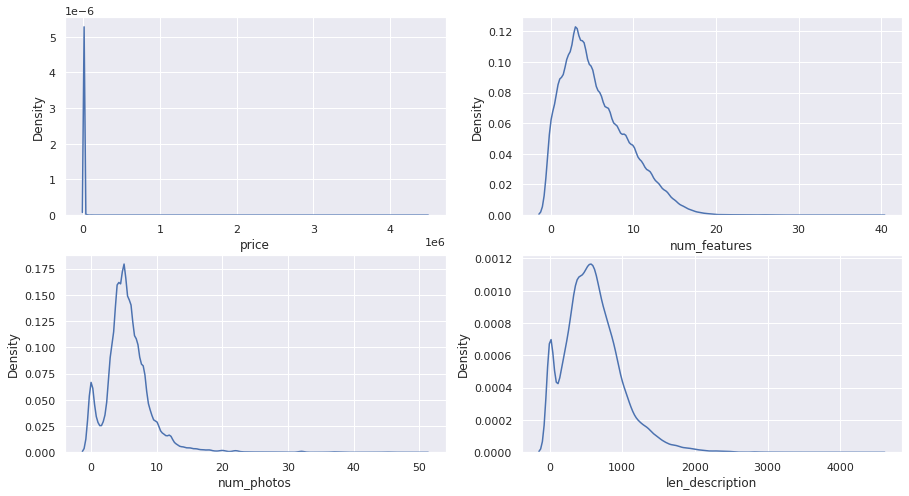

In [357]:
# числовые данные
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.distplot(X_train['price'], hist=False)
plt.subplot(2, 2, 2)
sns.distplot(X_train['num_features'], hist=False)
plt.subplot(2, 2, 3)
sns.distplot(X_train['num_photos'], hist=False)
plt.subplot(2, 2, 4)
sns.distplot(X_train['len_description'], hist=False);

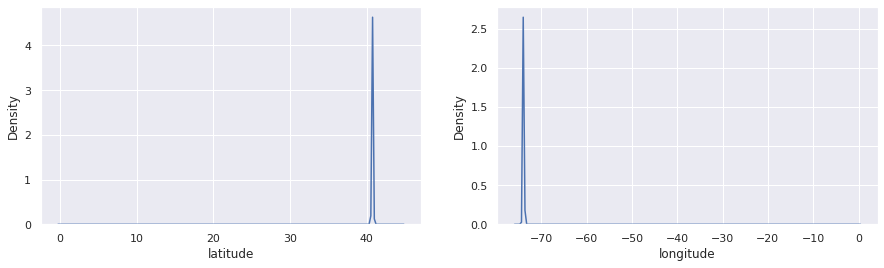

In [358]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.distplot(X_train['latitude'], hist=False)
plt.subplot(1, 2, 2)
sns.distplot(X_train['longitude'], hist=False);

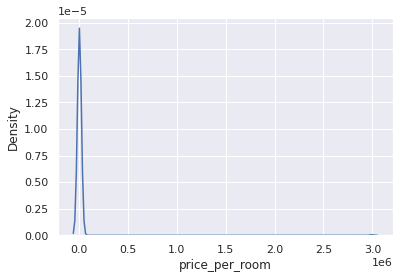

In [359]:
sns.distplot(X_train['price_per_room'], hist=False);

# Обучение моделей

### Функция потерь

In [398]:
metric = "balanced_accuracy"

### Бейзлайн

In [399]:
print(cross_val_score(LogisticRegression(class_weight={0:0.3276, 1:1.0, 2:2.9245}), X_train, y_train, scoring=metric).mean())

0.4624692897920009


### Убираем длинные хвосты

In [400]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_std

array([[-0.02411625,  0.10978967, -0.42559027, ..., -0.32035931,
        -0.17591734, -0.05797927],
       [ 1.19034425,  1.19278199, -0.42559027, ..., -1.45372473,
        -0.17591734, -0.05700169],
       [-0.02411625, -0.47038479, -0.42559027, ..., -0.81954947,
        -0.17591734, -0.0539098 ],
       ...,
       [-1.23857675, -0.97320265,  1.58968511, ..., -0.49609462,
        -0.17591734, -0.05704716],
       [-0.02411625, -0.08360182, -0.42559027, ...,  1.76808935,
        -0.17591734, -0.05792117],
       [-1.23857675, -1.59205541, -0.42559027, ..., -0.4782664 ,
        -0.17591734, -0.05883055]])

In [401]:
print(cross_val_score(LogisticRegression(class_weight={0:0.3276, 1:1.0, 2:2.9245}), X_train_std, y_train, scoring=metric).mean())

0.510891587228028


### Подбор параметров

In [402]:
grid = {"class_weight" : [{0:0.3276, 1:1.0, 2:2.9245}], "C" : np.linspace(0.1, 10, 10), "penalty" : ["l1", "l2"]}
logreg_cv = GridSearchCV(LogisticRegression(), grid, scoring=metric)
logreg_cv.fit(X_train_std, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]),
                         'class_weight': [{0: 0.3276, 1: 1.0, 2: 2.9245}],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [403]:
print(logreg_cv.best_score_)
print(logreg_cv.best_params_)

0.5148891287847167
{'C': 5.6, 'class_weight': {0: 0.3276, 1: 1.0, 2: 2.9245}, 'penalty': 'l2'}


In [404]:
log_reg = LogisticRegression(class_weight= {0: 0.3276, 1: 1.0, 2: 2.9245}, C=5.6, penalty='l2')
log_reg.fit(X_train_std, y_train)

LogisticRegression(C=5.6, class_weight={0: 0.3276, 1: 1.0, 2: 2.9245})

In [413]:
poly = PolynomialFeatures(2)
X_train_std_2 = poly.fit_transform(X_train_std)

In [414]:
scores = []
le = 15
re = 25
for i in tqdm(range(le, re)):
    X_data_kbest = SelectKBest(f_classif, k=i).fit_transform(X_train_std_2, y_train)
    scores.append(cross_val_score(log_reg, X_data_kbest, y_train, scoring=metric).mean())
    

100%|███████████████████████████████████████████| 10/10 [00:57<00:00,  5.78s/it]


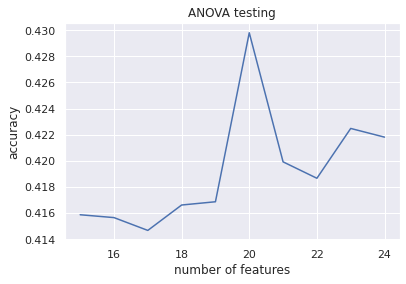

In [415]:
plt.plot(np.arange(le, re), scores)
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title('ANOVA testing');

In [416]:
#лучший результат ановы
print(max(scores))
print(le + np.argmax(scores))

0.42980593732345795
20


In [453]:
log_reg = LogisticRegression(class_weight= {0: 0.3276, 1: 1.0, 2: 2.9245}, C=5.6, penalty='l2', max_iter=1000)

In [454]:
selector1 = SequentialFeatureSelector(log_reg, scoring=metric,
                                     verbose=2, k_features=5, forward=True, n_jobs=-1) # жадный алгоритм
selector1.fit(X_train_std, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.6s finished

[2022-02-08 23:15:30] Features: 1/5 -- score: 0.440953203402562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    2.1s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.1s finished

[2022-02-08 23:15:34] Features: 2/5 -- score: 0.4909277078678664[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    2.4s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    3.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.8s finished

[2022-02-08 23:15:39] Features: 3/5 -- score: 0.5053987173493388[Parallel(n_jobs=-1)]: Using backend Loky

SequentialFeatureSelector(estimator=LogisticRegression(C=5.6,
                                                       class_weight={0: 0.3276,
                                                                     1: 1.0,
                                                                     2: 2.9245},
                                                       max_iter=1000),
                          k_features=5, n_jobs=-1, scoring='balanced_accuracy',
                          verbose=2)

In [456]:
X_train_forward = selector1.transform(X_train_std)
pd.DataFrame(X_train_forward)

,0,1,2,3,4
0,-0.425590,1.306672,-0.032830,0.023043,-0.623017
1,-0.425590,-0.484290,-0.068679,-0.050133,-0.623017
2,-0.425590,-1.379770,-0.018011,-0.079594,-0.878333
3,-0.425590,0.411191,-0.045874,-0.018582,0.653562
4,-0.425590,1.306672,-0.042325,0.068660,-0.367701
...,...,...,...,...,...
34541,-0.425590,-0.484290,0.026623,-0.073702,-1.133649
34542,-0.425590,-1.379770,-0.031321,-0.048993,0.653562
34543,1.589685,0.411191,-0.003281,0.046422,-1.388965
34544,-0.425590,0.411191,-0.028216,-0.018582,-0.367701


In [457]:
X_train_forward_2 = poly.fit_transform(X_train_forward) # добавим полиномиальных фичей

In [458]:
X_train_forward_2.shape

(34546, 21)

In [ ]:
selector2 = SequentialFeatureSelector(log_reg, scoring=metric,
                                     verbose=2, k_features=10, forward=True, n_jobs=-1) # жадный алгоритм
selector2.fit(X_train_forward_2, y_train)

In [470]:
X_train_forward_2 = selector2.transform(X_train_forward_2)

In [471]:
log_reg.fit(X_train_forward_2, y_train)

LogisticRegression(C=5.6, class_weight={0: 0.3276, 1: 1.0, 2: 2.9245},
                   max_iter=1000)

### Преобразование тест датасета

In [472]:
df = pd.read_csv('test-2.csv') # считываем данные
ids =  df['Id']
useless_cols = ['Id', 'listing_id', 'building_id', 'manager_id'] # удалим ненужные колонки
df.drop(columns=useless_cols, inplace=True)
df.drop(columns=np.array(['display_address', 'street_address']), inplace=True) # удалим строковые адреса
X_test = df.copy()
X_test['created'] = pd.to_datetime(X_test['created'], infer_datetime_format=True) # to date format
min_day = X_test['created'].min() # саммый ранний день в датасете
min_day = X_test['created'].min() # саммый ранний день в нашем датасете
X_test.insert(0, 'month', X_test['created'].dt.month) # создания колонок месяца
X_test.insert(1, 'day', (X_test['created'] - min_day).dt.days) # создания колонок дня дней
# Является ли этот день выходным
X_test['is_weekend'] = X_test['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)
X_test.drop(columns=['created'], inplace=True) # удаление полной даты
X_test.fillna(value='', inplace=True) # заполнение пропусков в discription
X_test['num_features'] = X_test['features'].apply(lambda x : x.count('\'') / 2) # количество "свойств"
X_test['num_photos'] = X_test['photos'].apply(lambda x : x.count('\'') / 2) # количество фотографий
X_test['len_description'] = X_test['description'].apply(lambda x : len(x)) # длина описания
X_test['description_NA'] = (X_test['description'] == '') # колонка есть ли описание
X_test.drop(columns=['features', 'photos', 'description'], inplace=True) # удаление замененных колонок
X_test['price_per_room'] = X_test['price'] / (X_test['bedrooms'] + X_test['bathrooms'])
X_test['price_per_room'][X_test['price_per_room'] == np.inf] = -1
X_test['price_per_room'][X_test['price_per_room'] == -1] = X_test['price_per_room'].max() * 2
X_test_std = std.transform(X_test) # нормализация данных

In [477]:
#X_test_std_2 = poly.transform(X_test_std) # добавим полиномиальные фичи
X_test_forward = selector1.transform(X_test_std)
X_test_forward_2 = poly.transform(X_test_forward)
X_test_forward_2 = selector2.transform(X_test_forward_2)

In [478]:
X_test_forward_2.shape

(14806, 10)

In [479]:
y_pred = log_reg.predict(X_test_forward_2)

In [481]:
Counter(y_pred)

Counter({0: 7268, 2: 4206, 1: 3332})

In [482]:
ans = pd.DataFrame({'Id' : ids, 'TARGET' : y_pred})
ans.head()

,Id,TARGET
0,19477,0
1,29937,2
2,109148,2
3,65728,0
4,33623,1


In [483]:
ans['TARGET'] = ans['TARGET'].map({0 : 'low', 1 : 'medium', 2 : 'high'})
ans.head()

,Id,TARGET
0,19477,low
1,29937,high
2,109148,high
3,65728,low
4,33623,medium


In [484]:
ans.to_csv('forward.csv', index=False)